In [1]:
import sys
import os
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as xes_converter
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.objects.log.obj import EventLog, Trace, Event
import math
import csv
from CminSampler import CminSampler
import constants
import os
import glob
import sys
import matplotlib.pyplot as plt
import format_logistic as fl

In [2]:
def read_dfs(df_path: str) -> []:
    '''reads all csv files for sampling'''
    
    # Use os.fchdir() method to change the dir
    fd = os.open(df_path, os.O_RDONLY )
    os.fchdir(fd)
    
    # use glob to get all the csv files in the folder
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    
    dataframes = []
    
    # loop over the list of csv files
    for f in csv_files:
        
        # get src and dest loc from the file name
        src_dest_loc = f.split('/')[-1].split('_')[1:]
        src_loc = src_dest_loc[0]
        dest_loc = src_dest_loc[1].split('.')[0]
        
        # read the csv file
        df = pd.read_csv(f)
        # format the dataframe
        #df = fl.format_dataframe(df, src_loc, dest_loc)
        dataframes.append(df)
        
    return dataframes

In [3]:
dataframes = read_dfs('./2022_csv_rectified_logs')

In [4]:
def convert_to_logs(dataframes: []):
    '''converts the dataframes into event logs and computes the number of cases of each log'''
    
    logs = []
    variants = []
    for dataframe in dataframes:
        log = xes_converter.apply(dataframe, variant=xes_converter.Variants.TO_EVENT_LOG) 
        logs.append(log)
        variant = pm4py.get_variants(log)
        variants.append(len(variant))
    return logs, variants

In [5]:
logs, variants = convert_to_logs(dataframes) 

/Users/sumyea/Desktop/Study/Study/WS21-22/Introduction_to_Data_Science/Assignment/Part1/env/lib/python3.8/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [14]:
def plot_distribution(statistic: [], plt_name: str, ylabel: str)-> None:
    
    x = [i for i in range(len(statistic))]
    y = statistic
    
    plt.plot(x, y)
    plt.xlabel('Dataframe Index')
    plt.ylabel(ylabel)
    plt.title(plt_name)
    #plt.savefig(figure_name)
    plt.show()

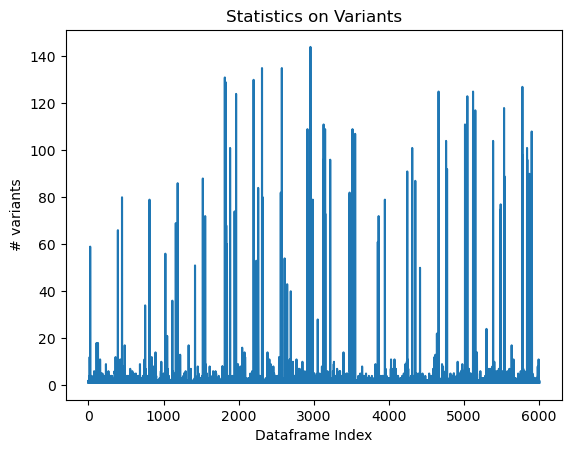

In [15]:
plot_distribution(variants, 'Statistics on Variants', '# variants')

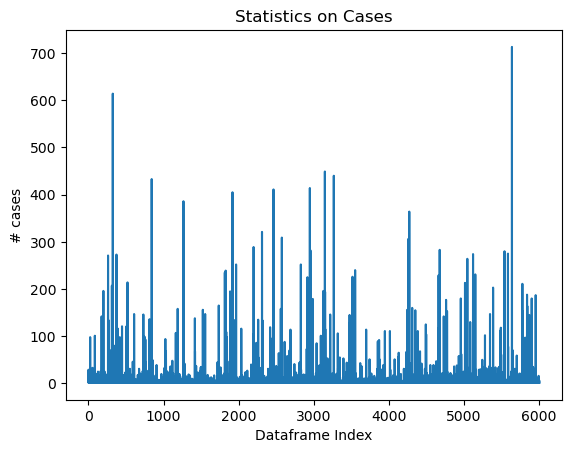

In [16]:
plot_distribution([len(log) for log in logs], 'Statistics on Cases', '# cases')

In [18]:
events = [len(set(df['concept:name'].to_list())) for df in dataframes]

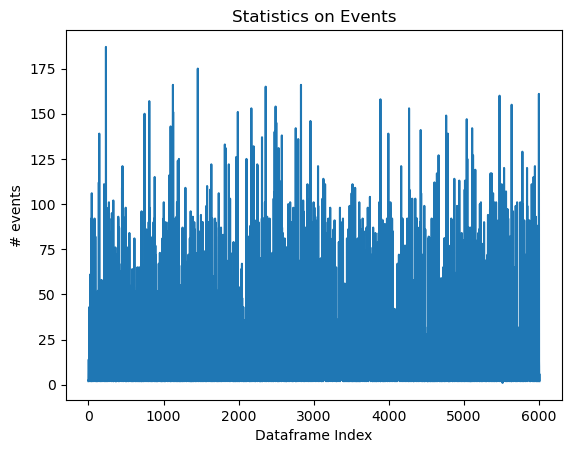

In [19]:
plot_distribution(events, 'Statistics on Events', '# events')